Konum Operatörü:
 Quantum object: dims=[[50], [50]], shape=(50, 50), type='oper', dtype=Dia, isherm=True
Qobj data =
[[0.         0.70710678 0.         ... 0.         0.         0.        ]
 [0.70710678 0.         1.         ... 0.         0.         0.        ]
 [0.         1.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         4.89897949 0.        ]
 [0.         0.         0.         ... 4.89897949 0.         4.94974747]
 [0.         0.         0.         ... 0.         4.94974747 0.        ]]
Momentum Operatörü:
 Quantum object: dims=[[50], [50]], shape=(50, 50), type='oper', dtype=Dia, isherm=True
Qobj data =
[[0.+0.j         0.-0.70710678j 0.+0.j         ... 0.+0.j
  0.+0.j         0.+0.j        ]
 [0.+0.70710678j 0.+0.j         0.-1.j         ... 0.+0.j
  0.+0.j         0.+0.j        ]
 [0.+0.j         0.+1.j         0.+0.j         ... 0.+0.j
  0.+0.j         0.+0.j        ]
 ...
 [0.+0.j         0.+0.j         0.+0.j   

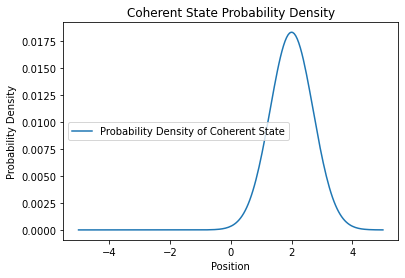

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *

# Hilbert uzayı boyutu
N = 50

# Konum ve Momentum operatörleri
x = position(N)
p = momentum(N)

# Sıkıştırma Operatörü
r = 0.5  # Sıkıştırma parametresi
squeeze_operator = squeeze(N, r)

# Faz Kaydırma Operatörü (Manuel tanımlama)
def phase_shift_operator(N, phi):
    a = destroy(N)
    return (a.dag() * np.exp(1j * phi) + a * np.exp(-1j * phi)).expm()

phi = np.pi / 4  # Faz kaydırma açısı
phase_shift_op = phase_shift_operator(N, phi)

# Koherent Durumu
alpha = 2 + 2j  # Koherent durum parametresi
coherent_state = coherent(N, alpha)

# Koherent durum üzerine sıkıştırma uygulama
squeezed_state = squeeze_operator * coherent_state

# Koherent durum üzerine faz kaydırma uygulama
phase_shifted_state = phase_shift_op * coherent_state

# Yoğunluk matrisi
density_matrix = ket2dm(coherent_state)

# Operatörlerin çıktıları
print("Konum Operatörü:\n", x)
print("Momentum Operatörü:\n", p)
print("Sıkıştırma Operatörü (r = 0.5):\n", squeeze_operator)
print("Faz Kaydırma Operatörü (phi = π/4):\n", phase_shift_op)
print("Koherent Durum:\n", coherent_state)
print("Sıkıştırılmış Koherent Durum:\n", squeezed_state)
print("Faz Kaydırılmış Koherent Durum:\n", phase_shifted_state)
print("Yoğunluk Matrisi:\n", density_matrix)

# Koherent durumun olasılık yoğunluğunu çiz
x_vals = np.linspace(-5, 5, 200)
prob_density = [abs(coherent_state.overlap(coherent(N, x_val)))**2 for x_val in x_vals]

plt.plot(x_vals, prob_density, label='Probability Density of Coherent State')
plt.xlabel('Position')
plt.ylabel('Probability Density')
plt.title('Coherent State Probability Density')
plt.legend()
plt.show()
